# BANKs

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.listdir('../data')

['bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank_excel.xlsx',
 'Linear_Models_Discriminants_Additive_Models_trees.R']

In [5]:
df = pd.read_csv('../data/bank.csv', ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data analysis

分析一下有什么啊

| col | method | meaning | more |
| ----- | ------------- | ----------- | --- |
| age：| 原始数据 | 年龄 | numeric |
| job：| one-hot | 工作 | 字符串 |
| marital：| one-hot | 婚姻状态 | {"married","divorced","single"} 三种 |
| education：| one-hot | 教育水平 | {"unknown","secondary","primary","tertiary"} 四种 |
| default：| 0-1编码 | 有无违约信用 | yes/no |
| balance：| 原始数据 | 欧元，年平均余额 | numeric |
| housing：| 0-1 | 有无住房贷款 | yes/no |
| loan：| 0-1 | 有无私人贷款 | yes/no |
| contact：| one-hot | 联系方式 | {"unknown","telephone","cellular"} 三种 |
| day：| 原始数据 | 本月上次联络日 | numeric |
| month：| 整数编码 | 本年上次联络月 | {"jan", "feb", "mar", ..., "nov", "dec"} |
| duration：| 原始数据 | 上次联络时长 | numeric |
| campaign：| 原始数据 | number of contacts performed during this campaign and for this client | numeric |
| pdays：| 原始数据 | 上次和客户联络后经过的时间 | numeric |
| previous：| 原始数据 | 此次campaign之前和这个客户联络的次数 | numeric |
| poutcome：| one-hot | 此次之前的campaign的结果 | {"unknown","other","failure","success"} |
| y：| 0-1 | 客户是否订阅短期存款 | yes/no |

使用pairplot观察不同因素对于y结果的影响程度，初步观察，从单因素角度来看duration,pdays, previous较为有意义。

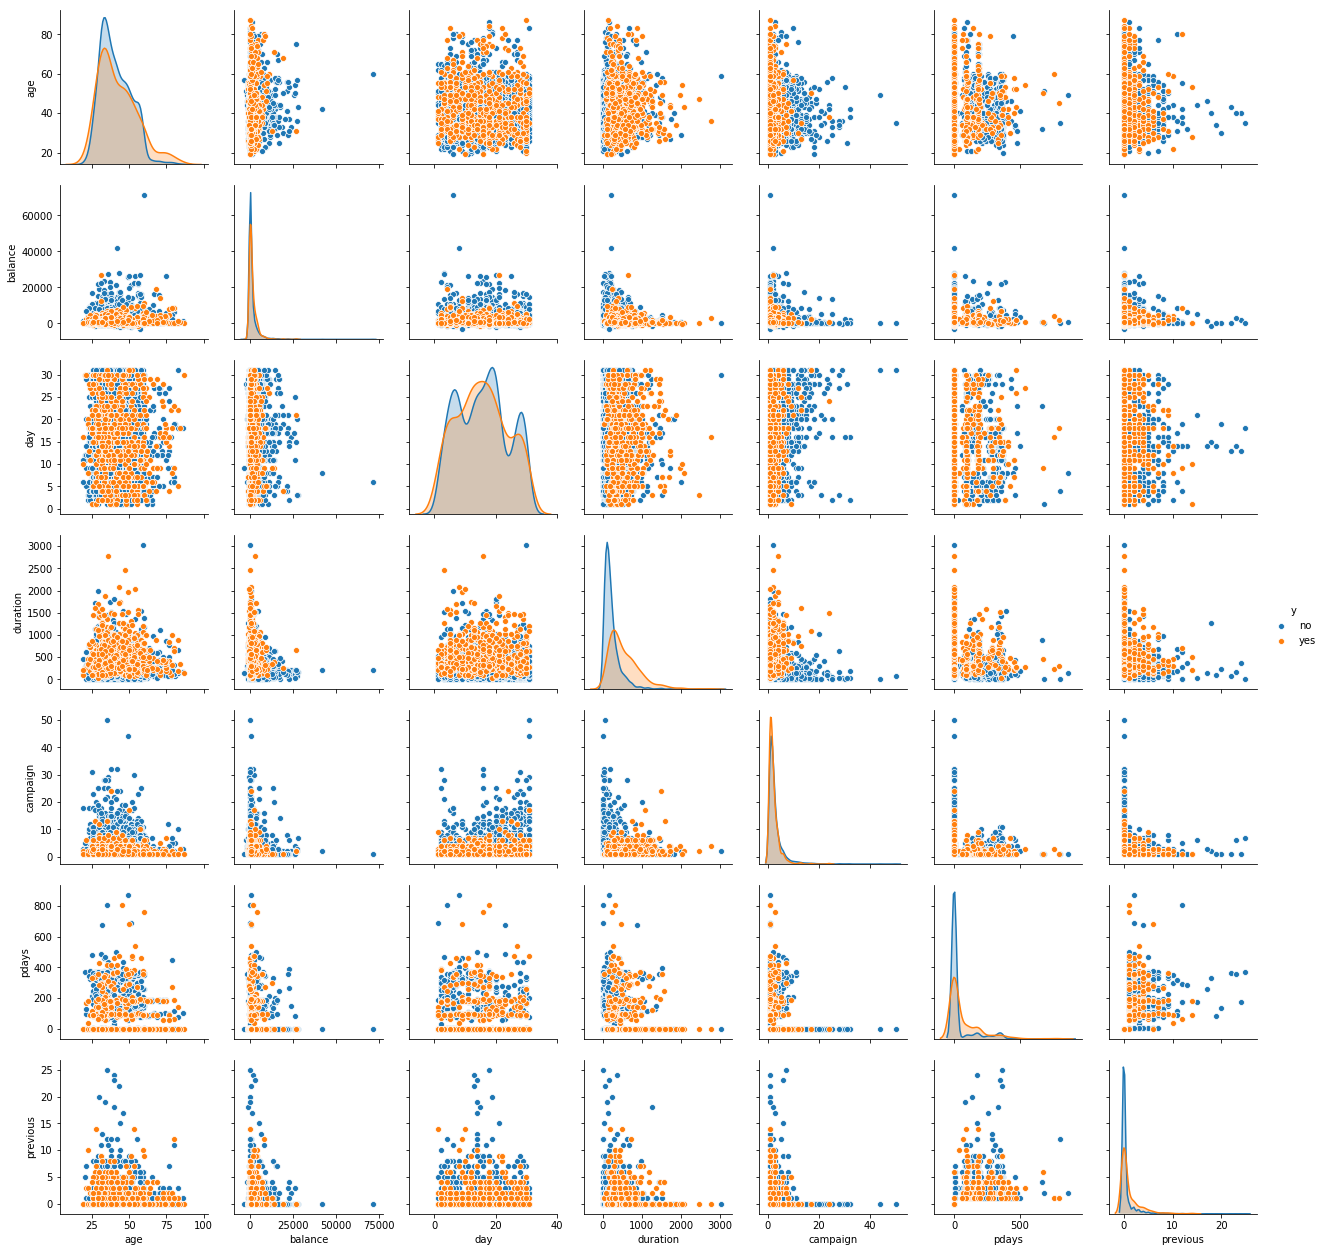

In [6]:
import seaborn as sns  # Seaborn is a library for making statistical graphics in Python. 
sns.pairplot(df, hue="y")

## One-hot code

In [23]:
df["month"] = df["month"].astype(pd.CategoricalDtype(['jan', 'feb', 'mar','apr', 'may', 'jun', 'jul', 'aug', 'sep',  'oct', 'nov', 'dec'], ordered=True)).cat.codes
dummies_df = pd.get_dummies(df, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "y"])

In [24]:
dummies_df.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes'],
      dtype='object')

In [25]:
dummies_df.shape

(4521, 42)

In [26]:
dummies_df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,-1,79,1,-1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,33,4789,11,-1,220,1,339,4,0,0,...,1,1,0,0,1,0,0,0,1,0
2,35,1350,16,-1,185,1,330,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,30,1476,3,-1,199,4,-1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,59,0,5,-1,226,1,-1,0,0,1,...,0,0,0,1,0,0,0,1,1,0


## Split the feature and label

In [44]:
banks_features = dummies_df.iloc[:,0:-2]
print(banks_features.shape)
banks_features.head()

(4521, 40)


,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,-1,79,1,-1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,11,-1,220,1,339,4,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,16,-1,185,1,330,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,3,-1,199,4,-1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,5,-1,226,1,-1,0,0,1,...,1,1,0,0,0,1,0,0,0,1


In [45]:
banks_label = dummies_df.iloc[:,-1]
print(banks_label.shape)
banks_label.head()

(4521,)


0    0
1    0
2    0
3    0
4    0
Name: y_yes, dtype: uint8

In [56]:
length1 = len(banks_label[banks_label==1])
length0 = len(banks_label[banks_label==0])
print("before the split")
print("for label is 1(yes), the number of y is {}".format(length1))
print("for label is 0(no), the number of y is {}".format(length0))
print("the ratio of yes/no is {}".format(length1/length0))

before the split
for label is 1(yes), the number of y is 521
for label is 0(no), the number of y is 4000
the ratio of yes/no is 0.13025


## Split the train and test set

In [47]:
from sklearn.model_selection import train_test_split
 
### Split the data into training and testing sets
### test_size = 0.33 (meaning 30% of the data will be used as test set)
### stratify = iris_label (meaning iris_label will be used to stratify the data)
train_features, test_features, train_labels, test_labels = train_test_split(
        banks_features, 
        banks_label, 
        test_size = 0.33, 
        stratify = banks_label, 
        random_state = 1)

In [48]:
### Checking Training Data and Testing Data dimensions
count_train = np.unique(train_labels, return_counts=True)
count_test = np.unique(test_labels, return_counts=True)

In [54]:
# 70% for training, 50*0.7=35
print(count_train)
print("the ratio of yes/no is {}".format(count_train[1][1]/count_train[1][0]))

(array([0, 1], dtype=uint8), array([2680,  349], dtype=int64))
the ratio of yes/no is 0.13022388059701492


In [55]:
print(count_test)
print("the ratio of yes/no is {}".format(count_test[1][1]/count_test[1][0]))

(array([0, 1], dtype=uint8), array([1320,  172], dtype=int64))
the ratio of yes/no is 0.1303030303030303


## Define functions

This part is also written in the ./src/commom.py for being easy to call.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


def loadData(filepath: str) -> pd.DataFrame:
    """
    Read data from file
    @param filepath: the path of the data file;
    @return: the data in DataFrame object;
    """
    df = pd.read_csv(filepath, ';')
    return df


def processData(origin_data: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Process the original data
    @param origin_data: original data in DataFrame object;
    @return: the data like (datas, labels) after processing;
    """
    origin_data["month"] = origin_data["month"].astype(pd.CategoricalDtype(['jan', 'feb', 'mar','apr', 'may', 'jun', 'jul', 'aug', 'sep',  'oct', 'nov', 'dec'], ordered=True)).cat.codes
    dummies_df = pd.get_dummies(origin_data, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome", "y"])
    
    return dummies_df


def split_dataset(data):
    X = data[data.columns[0:-1]].values
    y = data[data.columns[-1]].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.33)
    return X_train, X_test, y_train, y_test